# Heart Attack Prediction

Introduction.

The dataset "heart.csv" deals with the study of heart attacks, through a study carried out on 303 individuals and using various variables, such as age, gender, triglycerides, cholesterol and height, among others. This study carried out not only shows the complexity of cardiovascular health by uniting certain variables that allow recognizing heart attacks, but also offers a perspective of preventing heart disease and promoting a better quality of life. Among the most important variables, we found that age and gender are crucial factors influencing heart health. As we age, the structures and functions of the heart can change, increasing the risk of heart disease. On the other hand, there are studies that have shown that there are differences in the way men and women experience and develop cardiovascular diseases. Understanding these variations is essential to offer an effective and personalized approach to care.

The dataset makes it possible to correlate different variables, which, although they have already been identified in isolated or independent ways as prone variables for a person to suffer heart attacks, the complete set would help to understand or predict whether a person is prone to a heart attack, for example. Give some examples of relationship:

Triglyceride and cholesterol levels are critical indicators of heart health, high levels of these lipids in the blood can increase the risk of plaque buildup in the arteries, which can lead to heart disease.

In summary, the detailed study of the heart, integrating factors such as age, gender, triglycerides, cholesterol, height and others, plays an essential role in the prevention and treatment of heart disease. By considering these key variables, healthcare professionals can personalize care, make informed decisions, and promote a holistic approach to ensuring cardiovascular health throughout life.



About The Dataset

age: Age of the patient
sex: Sex of the patient
cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
trtbps: Resting blood pressure (in mm Hg)
chol: Cholestoral in mg/dl fetched via BMI sensor
fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False
restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
thalachh: Maximum heart rate achieved
oldpeak: Previous peak
slp: Slope
caa: Number of major vessels
thall: Thalium Stress Test result ~ (0,3)
exng: Exercise induced angina ~ 1 = Yes, 0 = No
output: Target variable


In [1]:
##IMPORT LIBRARIES OF NOTEBOOK

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score

import joblib

In [2]:
#We load the heart attack data set
dataset = pd.read_csv("C:/Users/Edgar F/Desktop/EdgarProyecto02/Heart_attack/heart_attack/heart_attack/data/heart.csv" )

In [5]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#We load the second data set with the oxygen saturation
os = pd.read_csv("C:/Users/Edgar F/Desktop/EdgarProyecto02/Heart_attack/heart_attack/heart_attack/data/o2Saturation.csv" )
os = os[:303]

In [6]:
dataset = pd.concat([dataset,os],axis=1)

In [7]:
dataset.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,97.5


# Data Preprocessing

In [8]:
#We corroborate the fields that our work dataset contains
dataset.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [9]:
#cheak the number of unique value
dataset.select_dtypes(include="float").nunique()

oldpeak    40
98.6        7
dtype: int64

# EDA

In [10]:
#Working with Catagorical variable
cat_var = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', '98.6']

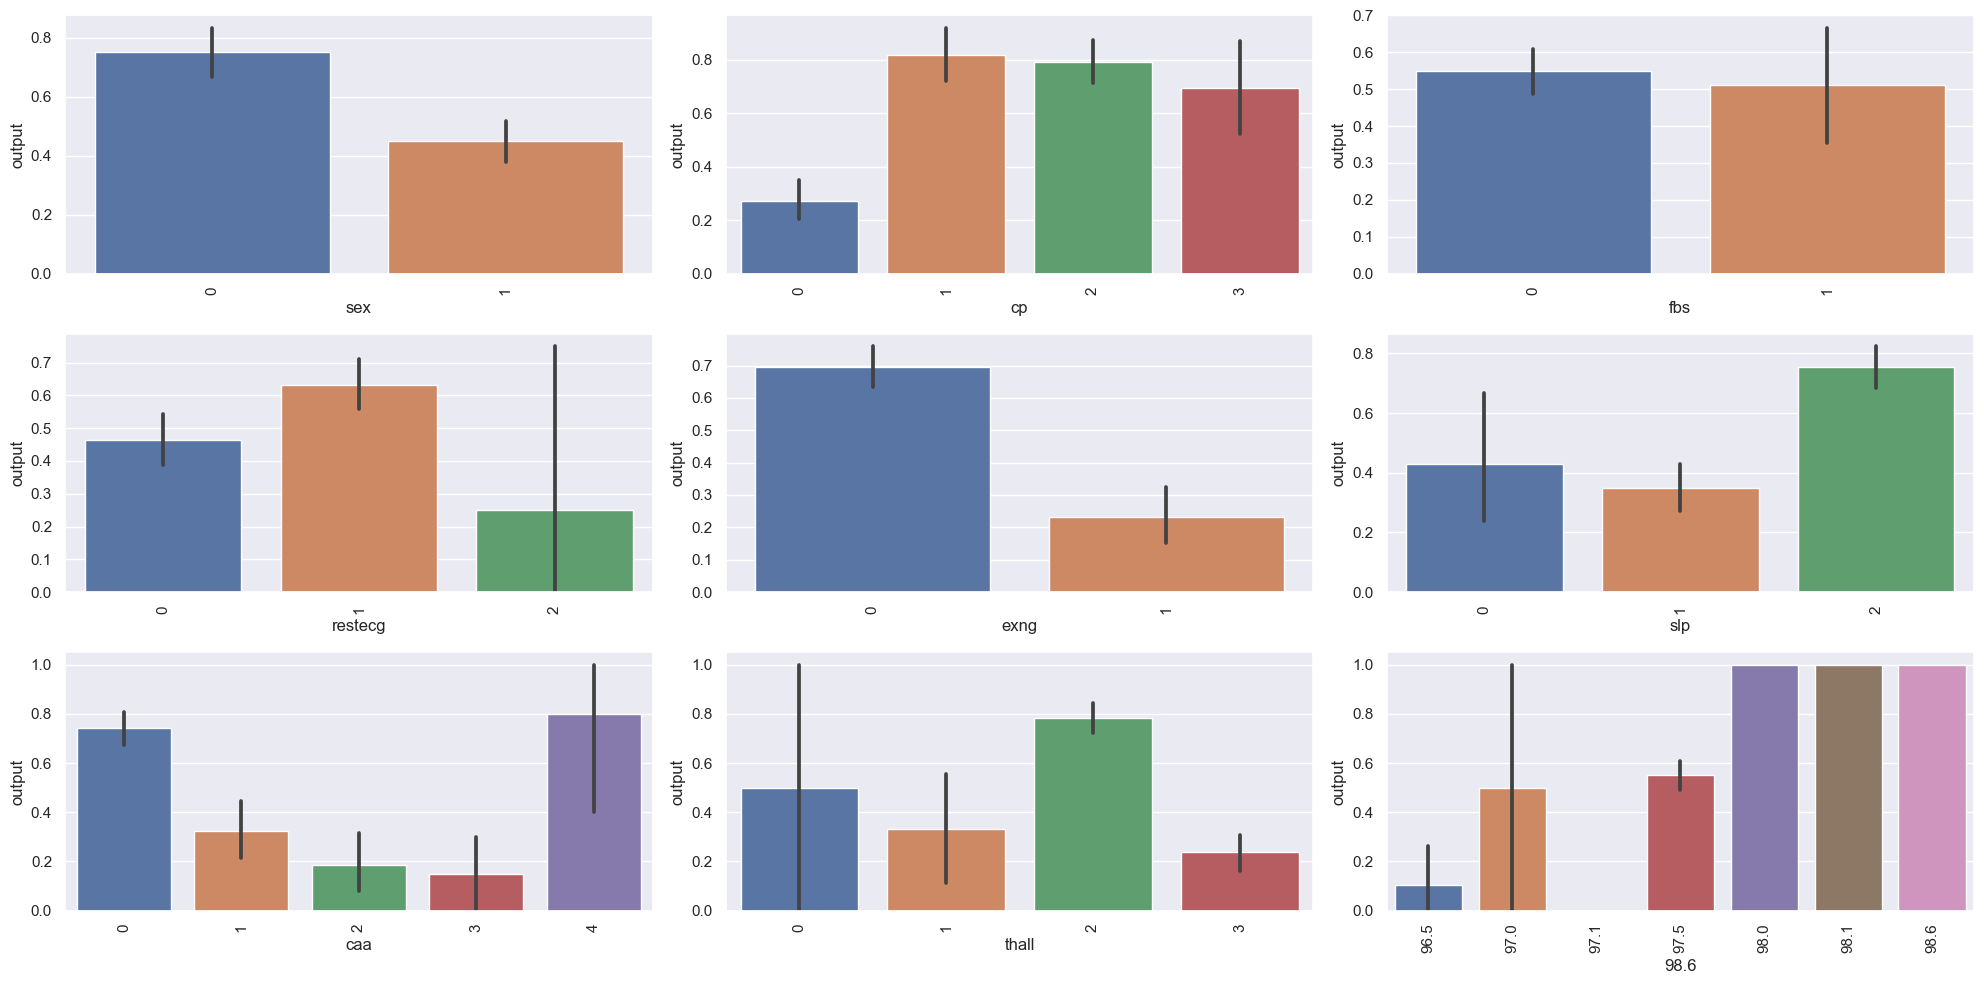

In [11]:
#We graph according to your category

num_cat_vars = len(cat_var)
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols
#Creating Fig with subplot
fig, axs = plt.subplots(nrows= num_rows, ncols= num_cols,figsize= (20,10))
axs= axs.flatten()

#Creating barplot for each catagorical variable
for i,var in enumerate(cat_var):
    sns.barplot(x=var,y='output',data=dataset ,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    
    #adjust spacing between subplots
    fig.tight_layout()

#show plot
plt.show()


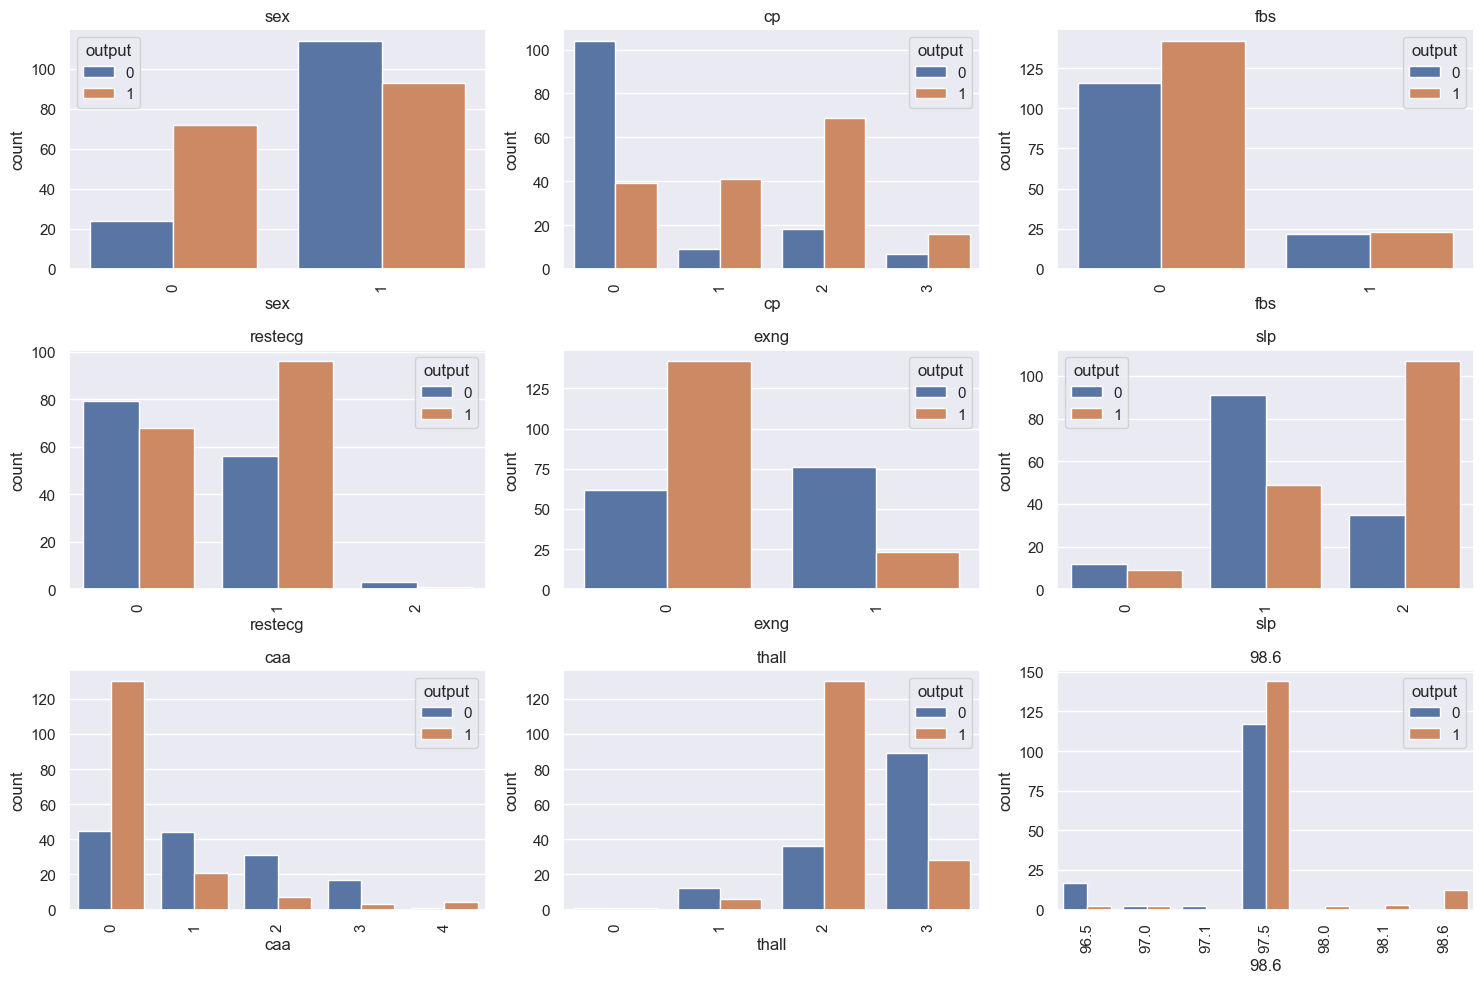

In [12]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(cat_var)
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through categorical variables and create countplots
for i, var in enumerate(cat_var):
    row = i // num_cols
    col = i % num_cols
    ax = axs[i]
    
    sns.countplot(data=dataset, x=var, hue='output', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(var)
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

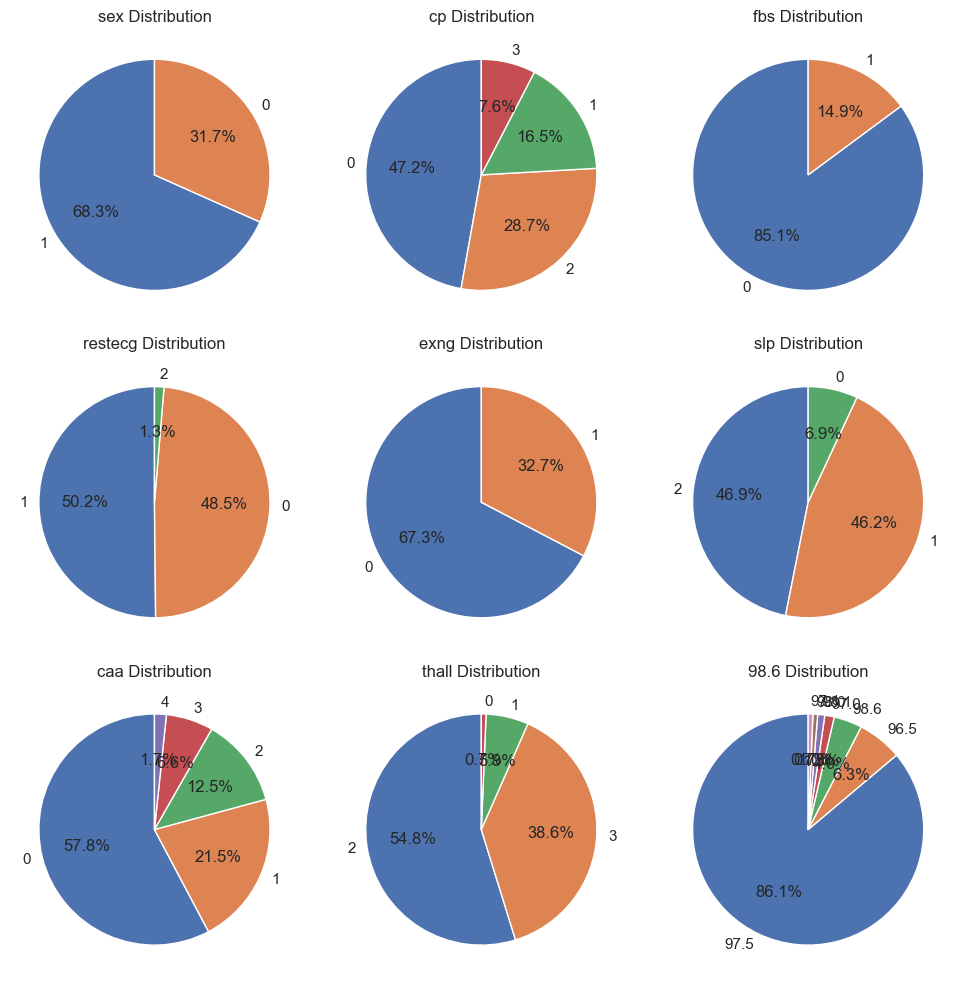

In [13]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(cat_var)
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through categorical variables and create countplots
for i, var in enumerate(cat_var):
    if i < len(axs):
        ax = axs[i]
        cat_counts = dataset[var].value_counts()
        ax.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{var} Distribution')
    
# Adjust spacing between subplots
fig.tight_layout()

# If there's an extra subplot that needs to be removed
if len(axs) > num_cat_vars:
    fig.delaxes(axs[-1])

# Show the plot
plt.show()

In [14]:
num_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak',]

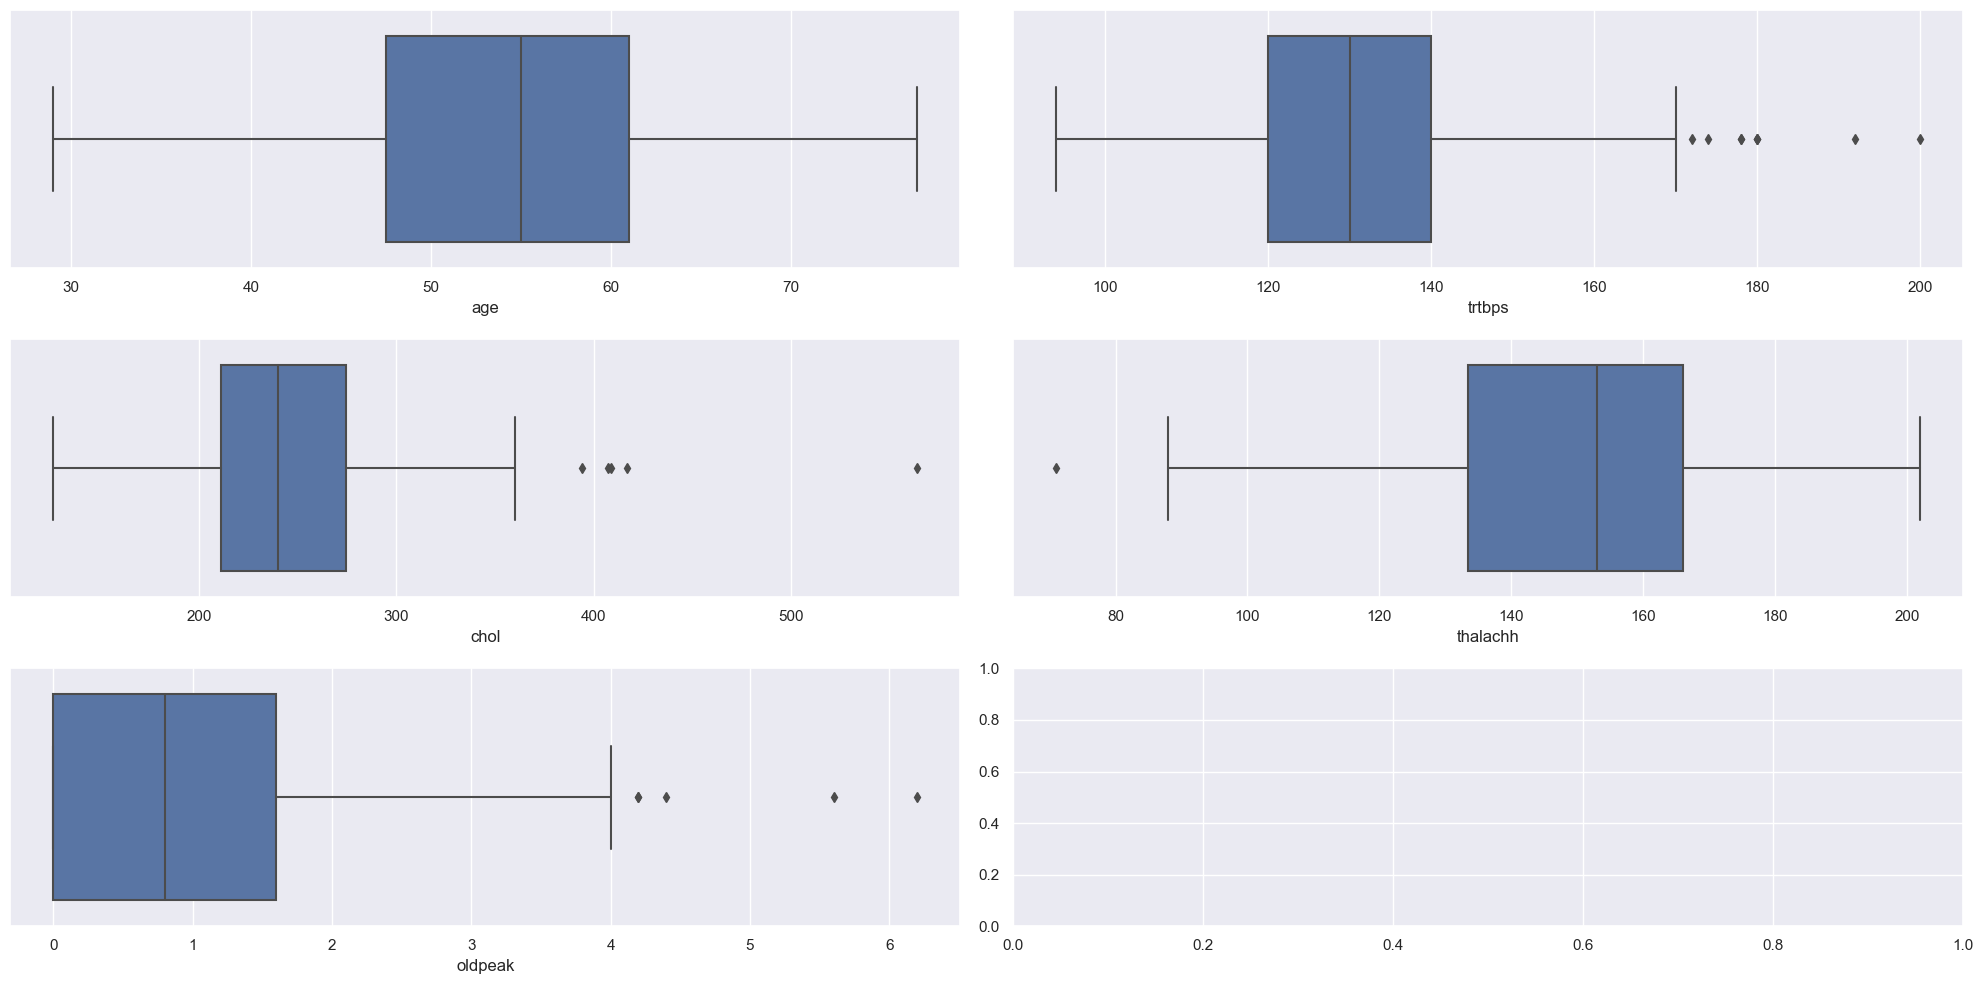

In [15]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var,data=dataset, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

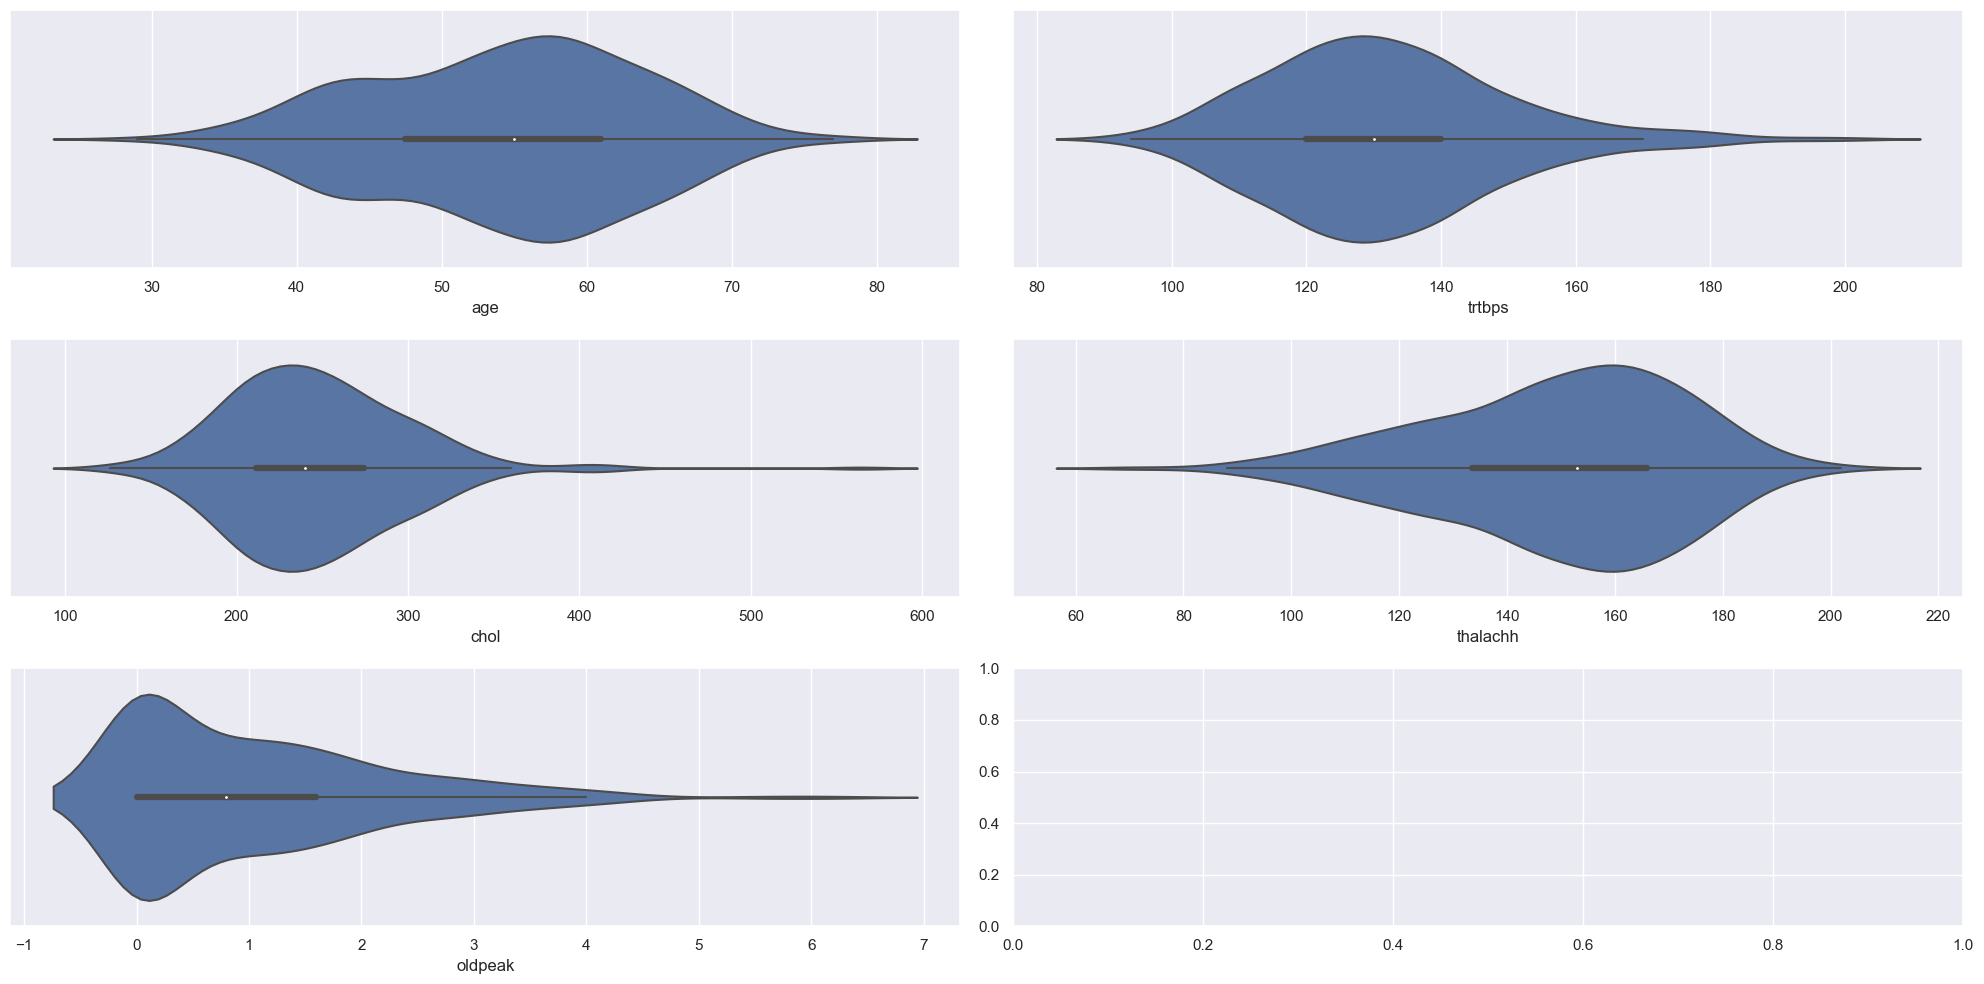

In [16]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var,data=dataset, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

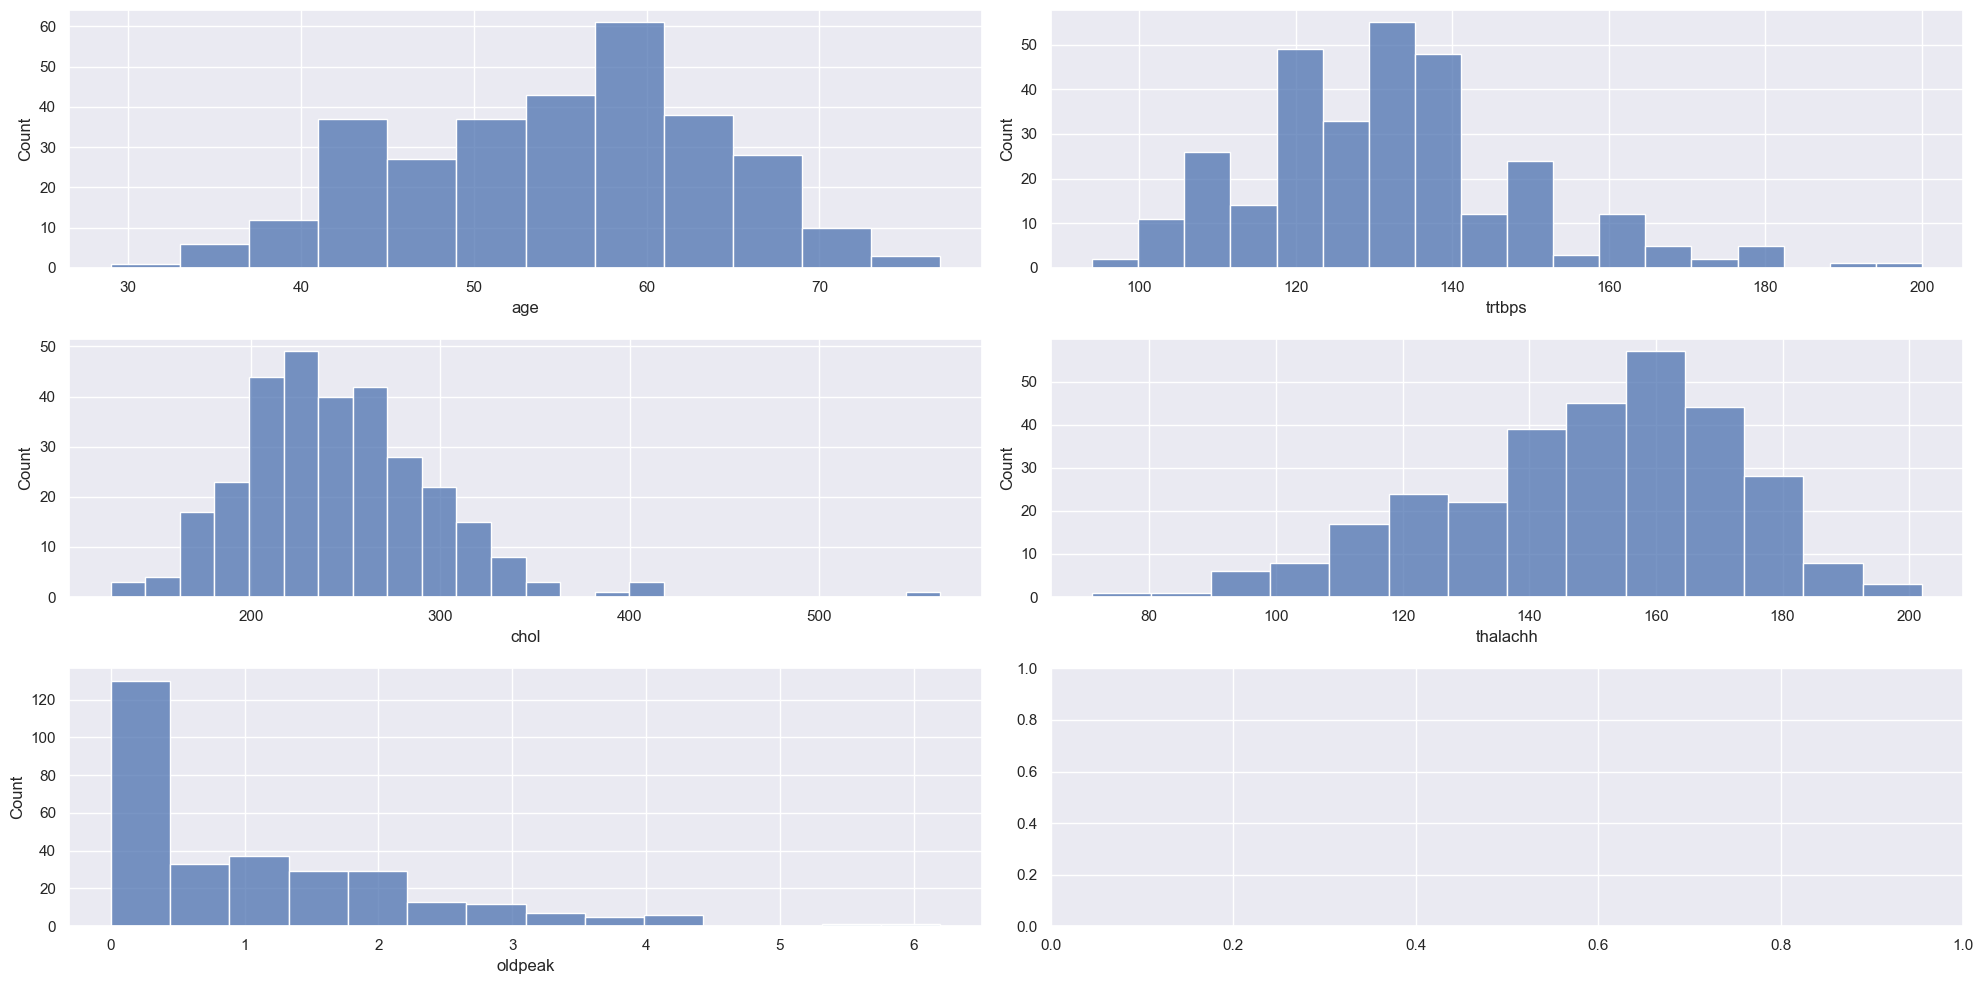

In [17]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var,data=dataset, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Dataprocessing 2
Working with Null values

<AxesSubplot:>

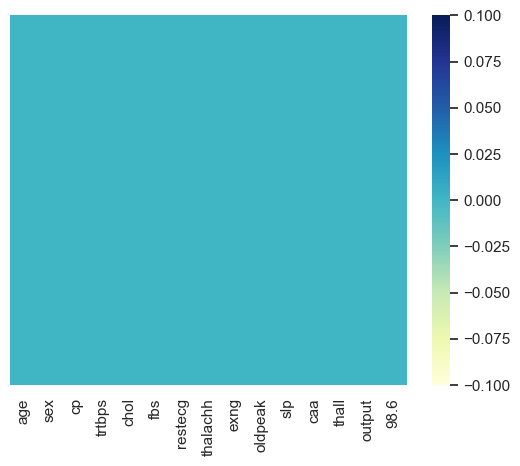

In [18]:

sns.heatmap(dataset.isnull() ,yticklabels=False , cmap="YlGnBu")

In [19]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
98.6        0
dtype: int64

In [75]:
#o2s = pd.get_dummies(dataset['98.6'],drop_first=True)

In [76]:
#o2s.head()

# Label Encoding

In [20]:
col = "98.6"
#initilization of LabelEncoder
label_encoding= preprocessing.LabelEncoder()
    
#fiting encoder to unique value
label_encoding.fit(dataset[col].unique())
    
#transform the column using encoder
dataset[col] = label_encoding.transform(dataset[col])
    
#print column name and new value
print(f"{col}:{dataset[col].unique()}")
    

98.6:[6 5 3 4 1 0 2]


# Heatmap Corelation

<AxesSubplot:>

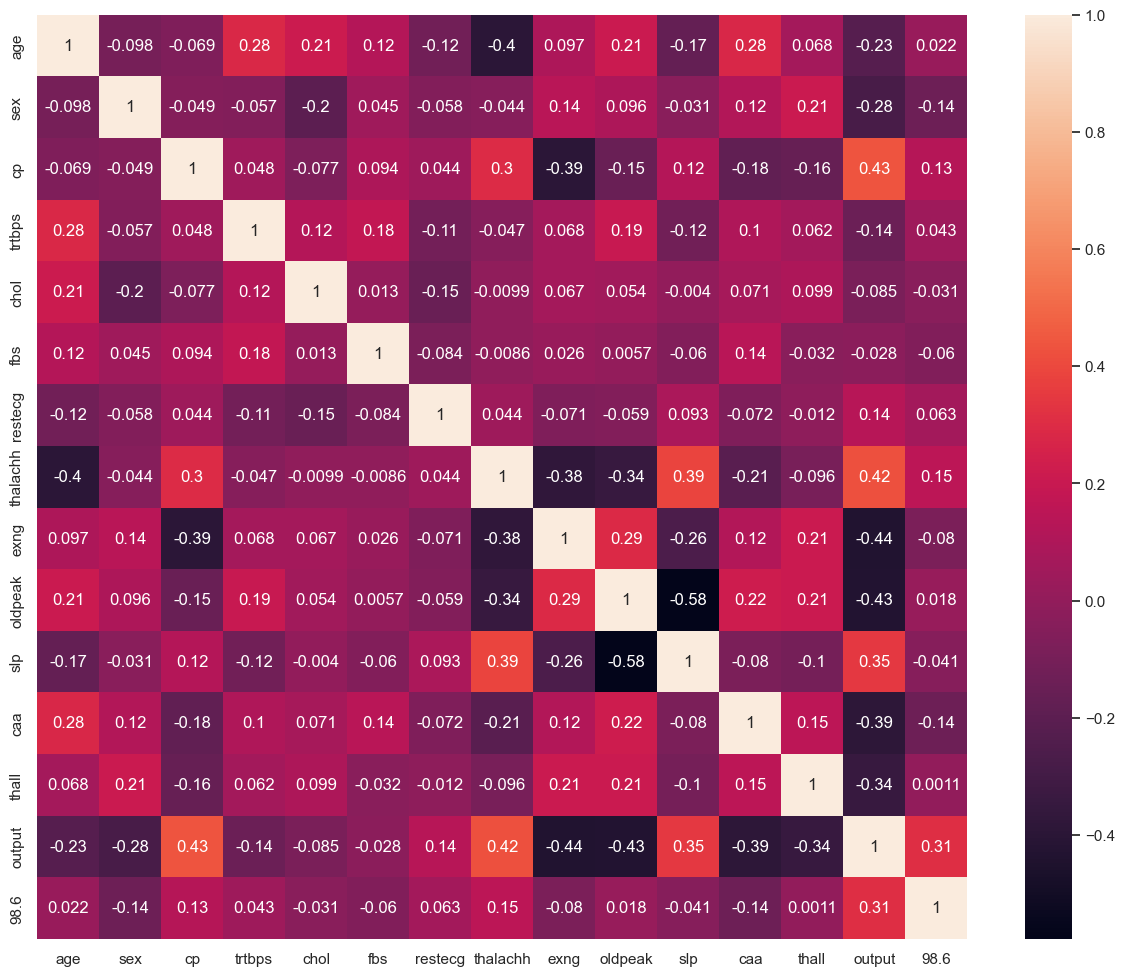

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(),fmt='.2g',annot=True)

In [22]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,3


In [23]:
y = dataset[["output"]]
dataset.drop(columns=['output', '98.6'], inplace=True)

In [28]:
x = dataset

# Applying Random Forest Algorithm

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier()

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
model.fit(x_train, y_train)

c:\Users\Edgar F\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [31]:
y_pred = model.predict(x_test)

In [32]:
 # Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[24  5]
 [ 7 25]]


In [33]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8032786885245902


In [34]:
# Calculate precision score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

Precision Score: 0.8333333333333334


In [35]:
# Calculate recall score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Recall Score: 0.78125


In [36]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.8064516129032259


In [37]:
# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [38]:
joblib.dump(model, "rf_heart_attack.pkl")

['rf_heart_attack.pkl']

Testing model after loading it:

In [ ]:
model = joblib.load("C:/Users/Edgar F/Desktop/EdgarProyecto02/Heart_attack/heart_attack/heart_attack/models/rf_heart_attack.pkl")

In [40]:
model.predict(x_test)

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
x_test.iloc[[5]]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [42]:
model.predict(x_test.iloc[[5]])

array([1], dtype=int64)

In [43]:
dict(x_test.iloc[5, :])

{'age': 57.0,
 'sex': 1.0,
 'cp': 2.0,
 'trtbps': 150.0,
 'chol': 168.0,
 'fbs': 0.0,
 'restecg': 1.0,
 'thalachh': 174.0,
 'exng': 0.0,
 'oldpeak': 1.6,
 'slp': 2.0,
 'caa': 0.0,
 'thall': 2.0}

In [104]:
{"age": 57.0,
 "sex": 1.0,
 "cp": 2.0,
 "trtbps": 150.0,
 "chol": 168.0,
 "fbs": 0.0,
 "restecg": 1.0,
 "thalachh": 174.0,
 "exng": 0.0,
 "oldpeak": 1.6,
 "slp": 2.0,
 "caa": 0.0,
 "thall": 2.0}

{'age': 57.0,
 'sex': 1.0,
 'cp': 2.0,
 'trtbps': 150.0,
 'chol': 168.0,
 'fbs': 0.0,
 'restecg': 1.0,
 'thalachh': 174.0,
 'exng': 0.0,
 'oldpeak': 1.6,
 'slp': 2.0,
 'caa': 0.0,
 'thall': 2.0}

In [44]:
x_test.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')